## CMPINF 2100 Week 12 | Measuring CLASSIFICATION PERFORMANCE - ROC curve

In this leacture, we will learn what happens if the TRESHOLD which determines the classification is changed!

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Read Data

Read the data from LAST week.

In [2]:
df = pd.read_csv('../week_11/week_11_intro_binary_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


### Fit the mdoel

In [4]:
fit_glm = smf.logit(formula='y ~ x', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


### Predict the training set

In [5]:
df_copy = df.copy()

In [6]:
df_copy['pred_probability'] = fit_glm.predict( df )

### Classify the predictions on the training set

Start with the DEFAULT or COMMON threshold of 50%.

In [7]:
df_copy['pred_class'] = np.where( df_copy.pred_probability > 0.5, 1, 0 )

### Accuracy

In [8]:
np.mean( df_copy.y == df_copy.pred_class )

0.6782608695652174

### Confusion Matrix

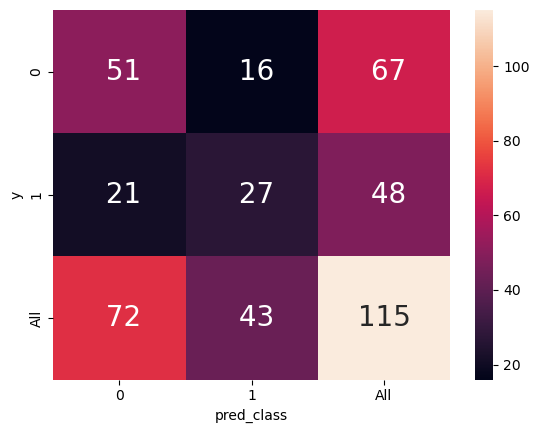

In [9]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab(df_copy.y, df_copy.pred_class, margins=True),
            annot=True, annot_kws={'size': 20}, fmt='3d' )

plt.show()

The confusion matrix counts can be easily calculated from a SKLEARN function.

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
TN, FP, FN, TP = confusion_matrix( df_copy.y.to_numpy(), df_copy.pred_class.to_numpy() ).ravel()

We can calculate the ACCURACY from the CONFUSION MATRIX.

In [12]:
Accuracy = (TN + TP) / (TN + FP + FN + TP)

In [13]:
Accuracy

0.6782608695652174

We can calculate the SENSITIVITY or TPR

In [14]:
Sensitivity = TP / (TP + FN)

In [15]:
Sensitivity

0.5625

We can calculate the SPECIFICITY or TNR.

In [16]:
Specificity = TN / (TN + FP)

In [17]:
Specificity

0.7611940298507462

Or we can express the Specificity via the FPR

In [18]:
FPR = 1 - Specificity

In [19]:
FPR

0.23880597014925375

The CONFUSION MATRIX and its summary stats DEPENDS on the ASSUMED THRESHOLD value!

Changing the threshold may change the CONFUSION MATRIX which means the Accuracy, Sensitivity, Specificity, and FPR may change for a model!

### Varying the Threshold

#### Increasing the threshold above 50%

Let's change the threshold from 50% to 75%. Now, we will only CLASSIFY the EVENT **IF** the predicted probability is GREATER than 75%.

**IMPORTANT**: We do **NOT** need to refit the model when we CHANGE the threshold!

In [20]:
df_copy.head()

,x,y,pred_probability,pred_class
0,-0.457429,1,0.270709,0
1,0.425948,1,0.513678,1
2,-0.784695,0,0.201258,0
3,-1.925209,0,0.061306,0
4,2.252617,1,0.901780,1


Let's add a new column which stores the CLASSIFICATION based on a higher threshold!

In [21]:
df_copy['pred_class_high_threshold'] = np.where( df_copy.pred_probability > 0.75, 1, 0)

In [22]:
df_copy.head()

,x,y,pred_probability,pred_class,pred_class_high_threshold
0,-0.457429,1,0.270709,0,0
1,0.425948,1,0.513678,1,0
2,-0.784695,0,0.201258,0,0
3,-1.925209,0,0.061306,0,0
4,2.252617,1,0.901780,1,1


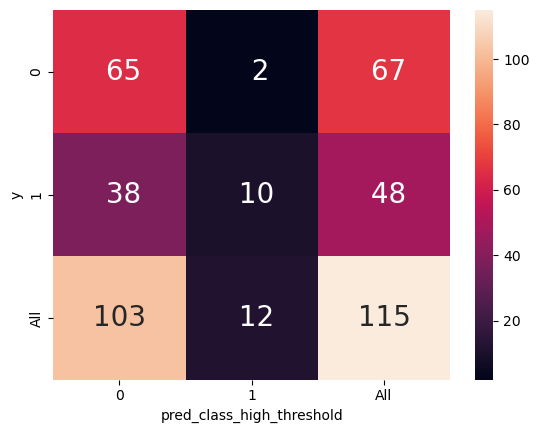

In [23]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( df_copy.y, df_copy.pred_class_high_threshold, margins=True),
            annot=True, annot_kws={'size': 20}, fmt='3d')

plt.show()

Let's directly compare the CONFUSION MATRICES between the two thresholds.

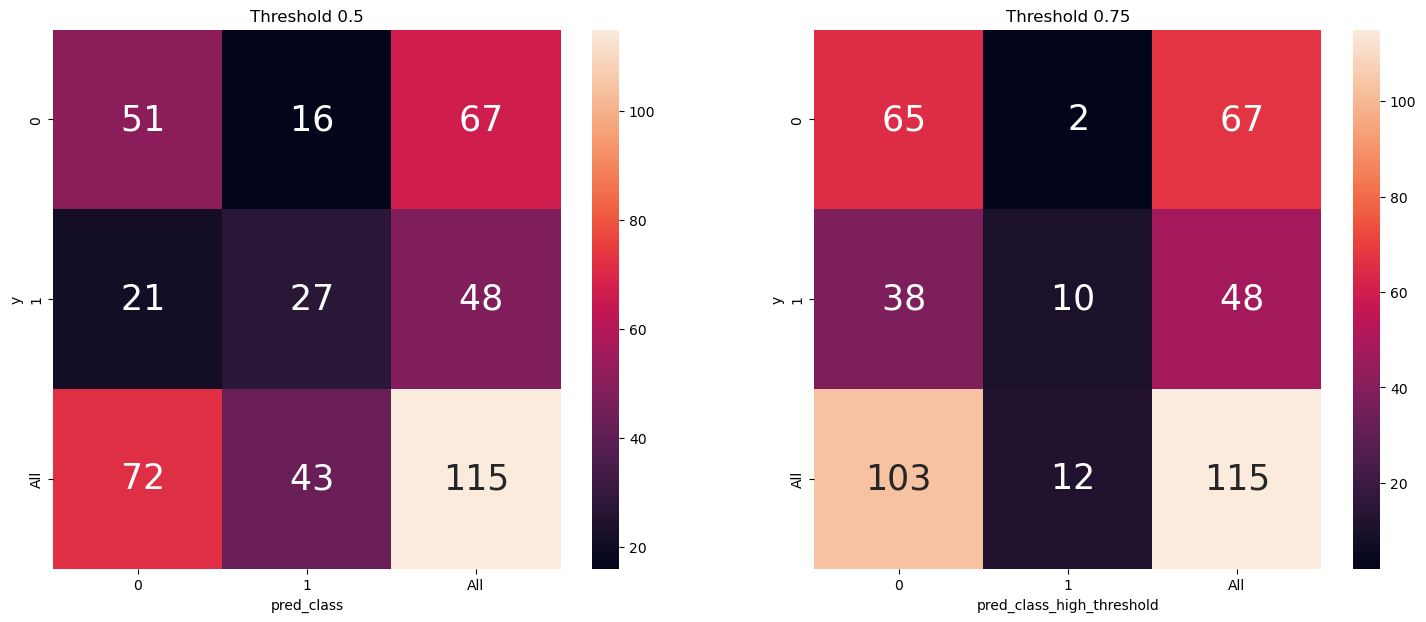

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax = ax.ravel()

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class, margins=True), annot=True, annot_kws={'size': 25}, fmt='3d', ax=ax[0])
ax[0].set_title('Threshold 0.5')

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class_high_threshold, margins=True), annot=True, annot_kws={'size': 25}, fmt='3d', ax=ax[1])
ax[1].set_title('Threshold 0.75')

plt.show()

In [27]:
np.mean( df_copy.y == df_copy.pred_class_high_threshold )

0.6521739130434783

In [28]:
Accuracy

0.6782608695652174

Let's calculate the Sensitivity, Specificity, and FPR for the HIGHER threshold.

In [29]:
TN_higher, FP_higher, FN_higher, TP_higher = confusion_matrix( df_copy.y.to_numpy(), df_copy.pred_class_high_threshold.to_numpy()).ravel()

In [32]:
Accuracy_higher = (TN_higher + TP_higher) / (TN_higher + FP_higher + FN_higher + TP_higher)

In [33]:
Accuracy_higher

0.6521739130434783

In [35]:
Sensitivity_higher = (TP_higher) / (TP_higher + FN_higher)

In [36]:
Sensitivity_higher

0.20833333333333334

RAISING the threshold DECREASING the Sensitivity!

In [37]:
Specificity_higher = (TN_higher) / (TN_higher + FP_higher)

In [38]:
Specificity_higher

0.9701492537313433

Raising the threshold INCREASING the Specificity. 

Example with out data: The model is 97% accurate under the higher threshold ONLY when the event does NOT occur.

In [39]:
FPR_higher = 1 - Specificity_higher

In [40]:
FPR_higher

0.02985074626865669

Given that the event is not occuring, the model is only wrong 3% of the time (rounded)

Raising the threshold makes it HARDER to classify the event, meaning the FPR DECREASES!

### Decrease the threshold below 50%

Let's change the THRESHOLD from 50% to 25% and classify by comparing the predicted probability to just 25%!

In [41]:
df_copy['pred_class_low_threshold'] = np.where( df_copy.pred_probability > 0.25, 1, 0 )

In [42]:
df_copy

,x,y,pred_probability,pred_class,pred_class_high_threshold,pred_class_low_threshold
0,-0.457429,1,0.270709,0,0,1
1,0.425948,1,0.513678,1,0,1
2,-0.784695,0,0.201258,0,0,0
3,-1.925209,0,0.061306,0,0,0
4,2.252617,1,0.901780,1,1,1
...,...,...,...,...,...,...
110,-0.791672,0,0.199933,0,0,0
111,0.452238,1,0.521449,1,0,1
112,0.535510,1,0.545976,1,0,1
113,-0.532739,0,0.253472,0,0,1


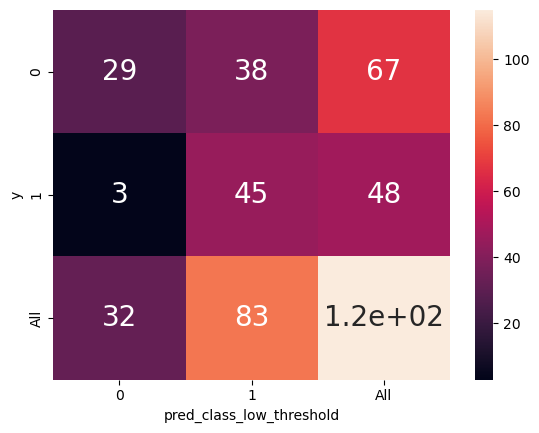

In [43]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( df_copy.y, df_copy.pred_class_low_threshold, margins=True),
            annot=True, annot_kws={'size': 20},
            ax=ax)

plt.show()

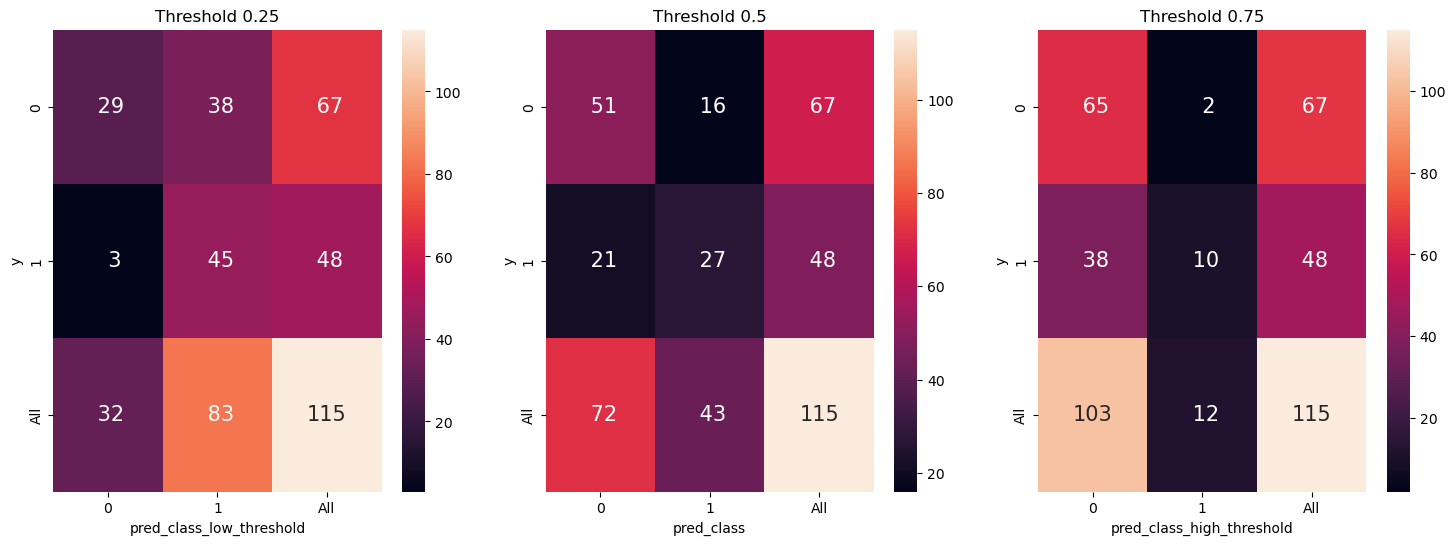

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax = ax.ravel()

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class_low_threshold, margins=True), annot=True, annot_kws={'size': 15}, fmt='3d', ax=ax[0])
ax[0].set_title('Threshold 0.25')

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class, margins=True), annot=True, annot_kws={'size': 15}, fmt='3d', ax=ax[1])
ax[1].set_title('Threshold 0.5')

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class_high_threshold, margins=True), annot=True, annot_kws={'size': 15}, fmt='3d', ax=ax[2])
ax[2].set_title('Threshold 0.75')

plt.show()

Let's calculate the confusion matrix combination counts directly.

In [46]:
TN_lower, FP_lower, FN_lower, TP_lower = confusion_matrix( df_copy.y.to_numpy(), df_copy.pred_class_low_threshold.to_numpy()).ravel()

In [47]:
Accuracy_lower = (TN_lower + TP_lower) / (TN_lower + FP_lower + FN_lower + TP_lower)

In [48]:
Accuracy_lower

0.6434782608695652

In [49]:
Sensitivity_lower = (TP_lower) / (TP_lower + FN_lower)

In [50]:
Sensitivity_lower

0.9375

DECREASING the THRESHOLD INCREASES the SENSITIVITY! 

"So when the event occurs by LOWERING the threshold, the model is really really good."

In [51]:
Specificity_lower = (TN_lower) / (TN_lower + FP_lower)

In [52]:
Specificity_lower

0.43283582089552236

DECREASING the THRESHOLD will DECREASE the SPECIFICITY!

In [53]:
Specificity

0.7611940298507462

In [54]:
FPR_lower = 1 - Specificity_lower

In [55]:
FPR_lower

0.5671641791044777

In [56]:
FPR

0.23880597014925375

DECREASING the THRESHOLD will INCREASE the FPR! (this is bad as the model will be incorrect, this is because it classifies the event even though it does not occur).

This is counterbalanced by the sensitivity being really high (closer to 1).

### Why would you want to CHANGE the THRESHOLD?

Why stray away from 50%?

It all depends on WHICH ERROR is worse!

### Graphically visualizing the impact of the different thresholds

We will visualize the Sensitivity or TPR and the FPR for different thresholds.

This graphic is known as the **ROC curve**.

In [57]:
my_roc = pd.DataFrame({'tpr': [ Sensitivity_lower, Sensitivity, Sensitivity_higher ], 
                      'specificity': [Specificity_lower, Specificity, Specificity_higher],
                      'fpr': [FPR_lower, FPR, FPR_higher],
                      'threshold': [0.25, 0.5, 0.75]})

In [58]:
my_roc

,tpr,specificity,fpr,threshold
0,0.937500,0.432836,0.567164,0.25
1,0.562500,0.761194,0.238806,0.50
2,0.208333,0.970149,0.029851,0.75


Create a scatter plot between the TPR and the FPR.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


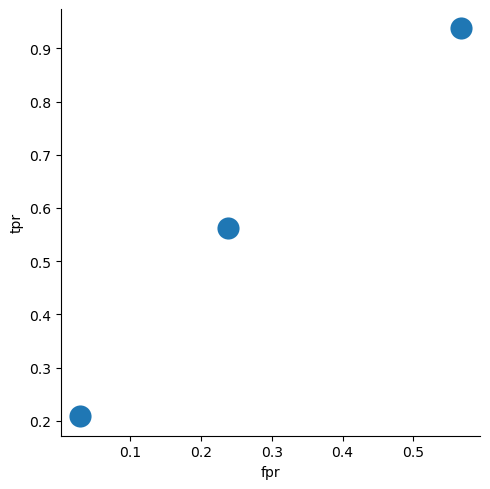

In [59]:
sns.relplot( data=my_roc, x='fpr', y='tpr', s=300)

plt.show()

The THRESHOLD is actually CONTROLLING the TPR and FPR!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


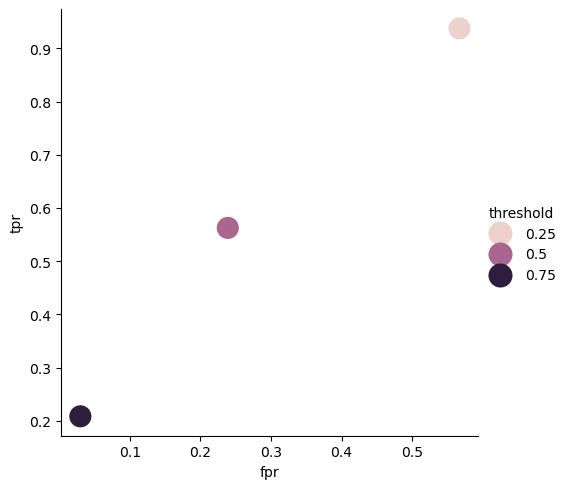

In [60]:
sns.relplot( data=my_roc, x='fpr', y='tpr', hue='threshold', s=300)

plt.show()

The ROC curve is tough to look at with just three threshold values... so INSTEAD we want to try **MANY** different thresholds from near 0 to near 1!

We can use a function in SKLEARN to create it for us!

In [61]:
from sklearn.metrics import roc_curve

The `roc_curve()` function does **NOT** require CLASSIFICATIONS! The `roc_curve()` function needs the model predicted EVENT PROBABILITY and IT will try out MANY DIFFERENT thresholds for you! The function will therefore CLASSIFY for many thresholds and calculate the TPR and FPR!

In [62]:
fpr_values, tpr_values, threshold_values = roc_curve( df_copy.y.to_numpy(), df_copy.pred_probability.to_numpy())

In [63]:
type( fpr_values )

numpy.ndarray

In [64]:
fpr_values.ndim

1

In [65]:
fpr_values.shape

(48,)

In [66]:
threshold_values[:11]

array([       inf, 0.91965265, 0.90178   , 0.89994071, 0.77691854,
       0.77046442, 0.68016518, 0.67409528, 0.67069707, 0.62306756,
       0.61991388])

Let's visualize the ROC curve as a STEP WISE line chart.

Let's make it using MATPLOTLIB directly.

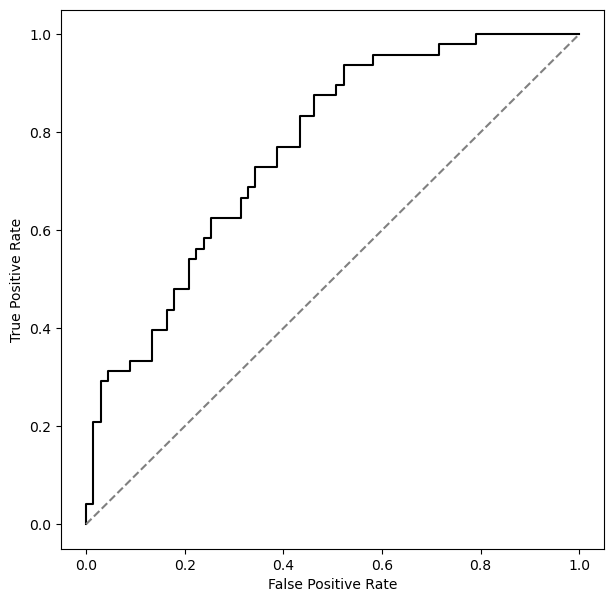

In [71]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(fpr_values, tpr_values, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle= '--')

ax.set_xlabel('False Positive Rate')

ax.set_ylabel('True Positive Rate')

plt.show()

Note: Low thresholds have high true positive rates

The ROC curve can be CONVERTED to a QUANTIFIABLE number by calculating the AREA under the Curve.

This number is known as the ROC AUC.

In [72]:
from sklearn.metrics import roc_auc_score

In [74]:
roc_auc_score( df_copy.y.to_numpy(), df_copy.pred_probability.to_numpy() )

0.763681592039801

The IDEA ROC AUC value is 1 and the WORST possible value is 0.5.

### Summary

The confusion matrix and ALL of its summary statistics, Accuracy, Sensitivity, Specificity, and FPR require a THRESHOLD to be assumed!

Once you assume a threshold you can convert the PREDICTED PROBABILITY into a CLASSIFICATION.

You can measure the performance against the KNOWWN observed output!

However, you CAN CHANGE the classification by CHANGING the threshold!

From a performance perspective, INCREASING the THRESHOLD improves certain metrics at the expense of other metrics! Likewise, DECREASING the THRESHOLDS hurts certain metrics while improving other metrics! The ROC curve is a GRAPHICAL TOOL to represent the **TRADE-OFF** between the metrics at all possible threshold values.

The ROC curve can be quantified by the ROC AUC.